# Experimento: IRIS

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.network import NeuralNetwork
from src.optimizers import Adam, SGD
from src.trainer import Trainer
from src.utils import split_data, one_hot, transform_minmax, fit_minmax, accuracy

from data.iris_loader import load_iris_csv, CLASS_NAMES

## Carga del dataset IRIS

In [51]:
import importlib, data.iris_loader as il
importlib.reload(il)
X, y, class_names = il.load_iris_csv()

num_classes = len(class_names)

(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_data(
    X, y, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42, shuffle=True
)

Xmin, denom = fit_minmax(X_train)
X_train = transform_minmax(X_train, Xmin, denom)
X_val   = transform_minmax(X_val,   Xmin, denom)
X_test  = transform_minmax(X_test,  Xmin, denom)

y_train_oh = one_hot(y_train, num_classes)
y_val_oh   = one_hot(y_val,   num_classes)
y_test_oh  = one_hot(y_test,  num_classes)

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)
print('Clases:', class_names)

Train: (105, 4) Val: (22, 4) Test: (23, 4)
Clases: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


## Utilidades locales

In [52]:
def plot_history(history, title=''):
    plt.figure()
    plt.plot(history['train_loss'], label='train')
    if history['val_loss'][-1] is not None:
        plt.plot(history['val_loss'], label='val')
    plt.title(title + ' loss'); plt.legend(); plt.show()

    plt.figure()
    plt.plot(history['train_acc'], label='train')
    if history['val_acc'][-1] is not None:
        plt.plot(history['val_acc'], label='val')
    plt.title(title + ' acc'); plt.legend(); plt.show()

def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm

## Entrenamiento IRIS

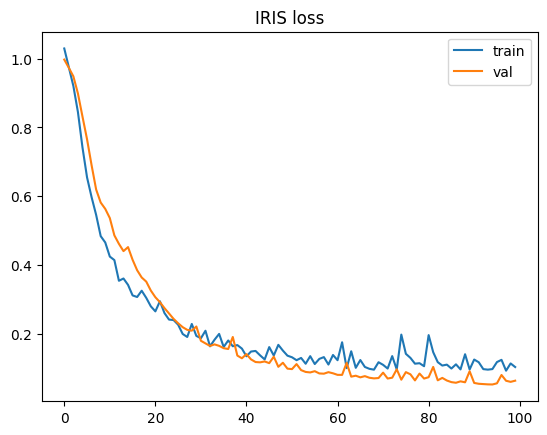

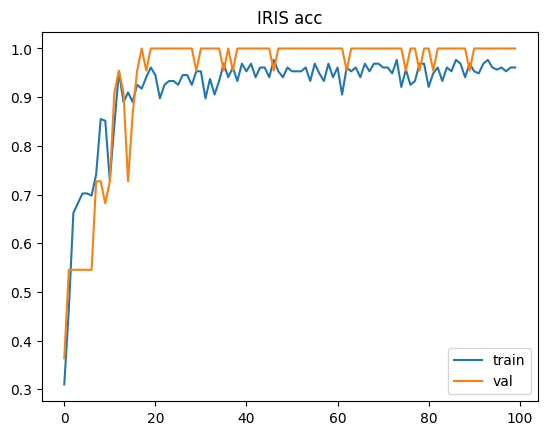

In [53]:
input_dim = X_train.shape[1]
architecture = [input_dim, 16, 16, num_classes]
activations = ['relu', 'relu', 'softmax']
optimizer = SGD(lr=0.05, momentum=0.9)

net = NeuralNetwork(architecture, activations)
trainer = Trainer(net, optimizer, loss='cross_entropy')

history = trainer.train(
    X_train, y_train_oh,
    X_val=X_val, y_val=y_val_oh,
    epochs=100,
    batch_size=32,
    classification=True,
    verbose=False
)

plot_history(history, title='IRIS')

## Evaluación en test

In [54]:
probs_test = net.forward(X_test)
test_acc = accuracy(y_test_oh, probs_test)
y_pred = np.argmax(probs_test, axis=1)
cm = confusion_matrix(y_test, y_pred, num_classes)

print('Accuracy test:', float(test_acc))
print('Matriz de confusión:\n', cm)

Accuracy test: 1.0
Matriz de confusión:
 [[ 5  0  0]
 [ 0  7  0]
 [ 0  0 11]]
